##Glorot_uniform & Softmax


In [5]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

In [6]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train.shape

11493376/11490434 [==============================] - 0s 0us/step


(60000, 28, 28)

7


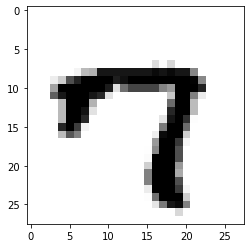

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline 
image_index = 6666 
print(y_train[image_index]) 
plt.imshow(x_train[image_index], cmap='Greys')

In [8]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [10]:
from tensorflow.keras import initializers
initializer = initializers.GlorotUniform()
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) 
model.add(Dense(128,kernel_initializer=initializer ,activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

In [11]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.2087 - accuracy: 0.9371
Epoch 2/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0798 - accuracy: 0.9757
Epoch 3/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0566 - accuracy: 0.9826
Epoch 4/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0428 - accuracy: 0.9858
Epoch 5/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.0335 - accuracy: 0.9886
Epoch 6/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0284 - accuracy: 0.9902
Epoch 7/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0240 - accuracy: 0.9919
Epoch 8/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0192 - accuracy: 0.9932
Epoch 9/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0194 - accuracy: 0.9932
Epoch 10/10
1875/1875 [==============================] - 30s 16m

In [12]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.0631 - accuracy: 0.9855


[0.06307137757539749, 0.9854999780654907]

3


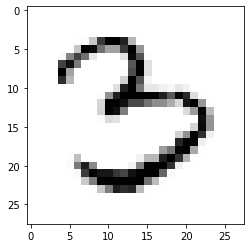

In [15]:
image_index = 2222
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())